In [2]:
import csv
import matplotlib.pyplot as plt
import numpy as np


def get_sample(file_name):
    with open(file_name) as f:
        reader = csv.reader(f)
        sample = [line[0] for line in reader][1:]
        sample = list(map(float, sample))
    return sample


def get_quantile(sorted_sample, q):
    size = len(sorted_sample)
    if isinstance((size - 1) * q + 1, int):
        return sorted_sample[(size - 1) * q + 1]
    else:
        return (sorted_sample[int((size - 1) * q + 1)] + sorted_sample[int((size - 1) * q + 2)]) / 2


def show_hist(sample):
    plt.hist(sample, bins=10, ec='blue', density=True)
    plt.xlabel('выборка')
    plt.ylabel('частота')
    plt.show()


def show_ecdf(sample):
    hist, edges = np.histogram(sample, bins=len(sample))
    heights = hist.cumsum()
    heights = [height / len(sample) for height in heights]

    plt.plot([113, edges[0]], [0, 0], c='blue')
    for i in range(len(heights)):
        plt.plot([edges[i], edges[i + 1]], [heights[i], heights[i]], c='blue')

    plt.axis([113, edges[-1], 0, 1])

    plt.show()

sample = get_sample('r1z1.csv')
sorted_sample = sorted(sample)

minimum = min(sample)
maximum = max(sample)
range_of_sample = maximum - minimum

avg = sum(sample) / len(sample)
dispersion = sum([(value - avg) ** 2 for value in sample]) / len(sample)
unbiased_dispersion = sum([(value - avg) ** 2 for value in sample]) / (len(sample) - 1)
deviation = dispersion ** 0.5
asymmetry_coeff = sum([(value - avg) ** 3 for value in sample]) / (len(sample) * deviation ** 3)
median = get_quantile(sorted_sample, 0.5)
interquartile_range = get_quantile(sorted_sample, 0.75) - get_quantile(sorted_sample, 0.25)

print(f'выборка: {sample}\n')
print(f'вариационный ряд: {sorted_sample}\n')
print(f'минимум: {minimum}')
print(f'размах: {range_of_sample}')
print(f'среднее: {avg}')
print(f'дисперсия: {dispersion}')
print(f'несмещенная дисперсия: {unbiased_dispersion}')
print(f'стандартное отклонение: {deviation}')
print(f'коеффициент ассиметрии: {asymmetry_coeff}')
print(f'медина: {median}')
print(f'интерквартильная широта: {interquartile_range}')

выборка: [123.0, 119.5, 120.5, 118.1, 117.5, 118.2, 124.5, 115.9, 121.0, 126.0, 121.3, 121.0, 118.2, 120.2, 124.3, 118.5, 117.2, 125.5, 115.0, 119.5, 126.0, 120.0, 126.5, 121.0, 125.0, 123.0, 122.7, 120.5, 122.5, 122.0, 122.5, 122.5, 122.5, 117.2, 123.0, 128.5, 120.5, 118.9, 116.2, 125.0, 125.1, 121.8, 122.0, 120.5, 123.0, 115.0, 120.5, 118.0, 125.0, 115.0, 117.0, 125.9, 122.0, 120.5, 121.1, 123.5, 120.7, 125.8, 120.5, 119.0, 120.5, 120.2, 123.0, 120.0, 117.2, 122.6, 120.2, 120.5, 123.0, 121.5, 120.0, 119.5, 115.0, 122.9, 123.3, 121.0, 122.5, 119.0, 124.0, 120.5, 121.9, 124.2, 121.5, 118.2, 122.2, 121.5, 120.0, 123.0, 119.5, 117.8, 119.2, 116.0, 123.0]

вариационный ряд: [115.0, 115.0, 115.0, 115.0, 115.9, 116.0, 116.2, 117.0, 117.2, 117.2, 117.2, 117.5, 117.8, 118.0, 118.1, 118.2, 118.2, 118.2, 118.5, 118.9, 119.0, 119.0, 119.2, 119.5, 119.5, 119.5, 119.5, 120.0, 120.0, 120.0, 120.0, 120.2, 120.2, 120.2, 120.5, 120.5, 120.5, 120.5, 120.5, 120.5, 120.5, 120.5, 120.5, 120.5, 120.7, 121.

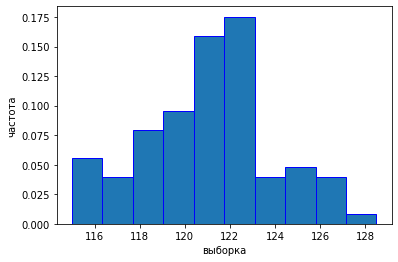

In [3]:
show_hist(sample)

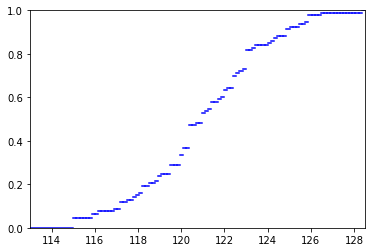

In [4]:
show_ecdf(sample)